# CPSC 8430 Deep Learning Homework 1-1: Deep vs Shallow
 
### Professor: Feng Luo


**Student First Name, LAST NAME, CUID**:  

Joy, YANG, #C91873986

### Simulate a function:
- Function need to be single-input, single-output  
- Function need to be non-linear   

### Train on actual task: 
- MNIST or CIFAR-10  

### Requirements:  
- Train at least two different DNN models with the same amount of parameters until convergence  
- Compare the training process of models by showing the loss in each epoch in a chart  
- Visualize the ground-truth and predictions by models in a graph

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import torchvision
from torchvision import datasets, transforms

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm


In [2]:
if torch.cuda.is_available():
    print("CUDA is available. You can run your code on GPU!")
else:
    print("CUDA is not available. Running on CPU instead.")


CUDA is available. You can run your code on GPU!


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### Define The Sinc Function

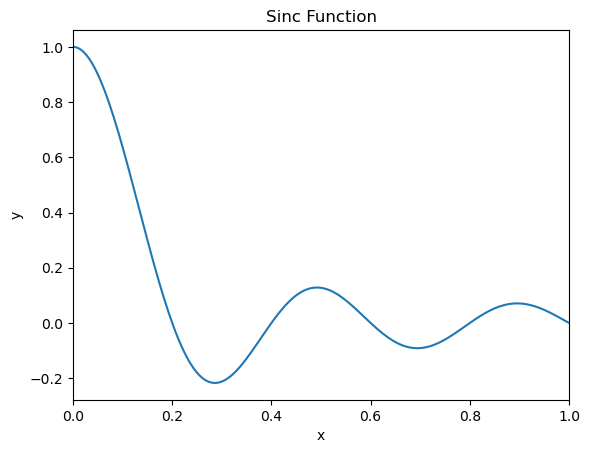

In [4]:
import torch
import matplotlib.pyplot as plt

# Define the Sinc function
def sinc_function(x):
    # Handle the case when x=0 to avoid division by zero error
    # Using the where function and sin function of PyTorch
    return torch.where(x == 0, torch.tensor(1.0), torch.sin(5 * torch.pi * x) / (5 * torch.pi * x))

# Generate input data
# Use the linspace function of PyTorch to generate a tensor
x = torch.linspace(-1, 1, 400) 
y = sinc_function(x)

# Visualize the Sinc function
# Convert PyTorch tensors to NumPy arrays for easy plotting with Matplotlib
plt.plot(x.numpy(), y.numpy())
plt.title('Sinc Function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, max(x.numpy())])
plt.show()


### Define Models

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Model0(nn.Module):
    def __init__(self):
        super(Model0, self).__init__()
        
        # Define the layers
        self.dense_1 = nn.Linear(1, 5)  
        self.dense_2 = nn.Linear(5, 10)
        self.dense_3 = nn.Linear(10, 10)
        self.dense_4 = nn.Linear(10, 10)
        self.dense_5 = nn.Linear(10, 10)
        self.dense_6 = nn.Linear(10, 10)
        self.dense_7 = nn.Linear(10, 5)
        self.dense_8 = nn.Linear(5, 1)

    def forward(self, x):
        # Define forward pass
        x = F.relu(self.dense_1(x))
        x = F.relu(self.dense_2(x))
        x = F.relu(self.dense_3(x))
        x = F.relu(self.dense_4(x))
        x = F.relu(self.dense_5(x))
        x = F.relu(self.dense_6(x))
        x = F.relu(self.dense_7(x))
        x = self.dense_8(x)  # Typically, the output layer doesn't have an activation if it's a regression task
        return x

# Create the model instance
model_0 = Model0()




# Count parameters, should be 571 for this model
total_params = sum(p.numel() for p in model_0.parameters())
print(f"Total parameters in model 0: {total_params}")


Total parameters in model 0: 571


In [6]:
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        # Define the layers
        self.dense_9 = nn.Linear(1, 10)  
        self.dense_10 = nn.Linear(10, 18)  
        self.dense_11 = nn.Linear(18, 15)  
        self.dense_12 = nn.Linear(15, 4)  
        self.dense_13 = nn.Linear(4, 1)  

    def forward(self, x):
        # Define forward pass
        x = F.relu(self.dense_9(x))
        x = F.relu(self.dense_10(x))
        x = F.relu(self.dense_11(x))
        x = F.relu(self.dense_12(x))
        x = self.dense_13(x)  
        return x

model_1 = Model1()


# Count parameters, should be 572 for this model
total_params = sum(p.numel() for p in model_1.parameters())
print(f"Total parameters in model 1: {total_params}")


Total parameters in model 1: 572


In [7]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        # Define the layers according to the specifications
        self.dense_14 = nn.Linear(1, 190)  # From 1 input feature to 190 output features
        self.dense_15 = nn.Linear(190, 1)  # From 190 input features to 1 output feature

    def forward(self, x):
        # Define the forward pass
        x = F.relu(self.dense_14(x))
        x = self.dense_15(x)  # Typically, no activation function is used for the final layer in regression tasks
        return x

# Create the model instance
model_2 = Model2()

# Count parameters
total_params = sum(p.numel() for p in model_2.parameters())
print(f"Total parameters in model 2: {total_params}")

Total parameters in model 2: 571


### Train Models on Sinc Function

0it [00:00, ?it/s]

Model 0, Epoch [1/20000], Loss: 0.2273
Model 0, Epoch [2001/20000], Loss: 0.0010
Model 0, Epoch [4001/20000], Loss: 0.0022
Model 0, Epoch [6001/20000], Loss: 0.0022
Model 0, Epoch [8001/20000], Loss: 0.0001
Model 0, Epoch [10001/20000], Loss: 0.0002
Model 0, Epoch [12001/20000], Loss: 0.0000
Model 0, Epoch [14001/20000], Loss: 0.0001
Model 0, Epoch [16001/20000], Loss: 0.0000
Model 0, Epoch [18001/20000], Loss: 0.0000


1it [04:27, 267.35s/it]

Model 1, Epoch [1/20000], Loss: 0.1014
Model 1, Epoch [2001/20000], Loss: 0.0062
Model 1, Epoch [4001/20000], Loss: 0.0039
Model 1, Epoch [6001/20000], Loss: 0.0090
Model 1, Epoch [8001/20000], Loss: 0.0062
Model 1, Epoch [10001/20000], Loss: 0.0070
Model 1, Epoch [12001/20000], Loss: 0.0074
Model 1, Epoch [14001/20000], Loss: 0.0012
Model 1, Epoch [16001/20000], Loss: 0.0082
Model 1, Epoch [18001/20000], Loss: 0.0057


2it [07:46, 227.18s/it]

Model 2, Epoch [1/20000], Loss: 0.0338
Model 2, Epoch [2001/20000], Loss: 0.0003
Model 2, Epoch [4001/20000], Loss: 0.0001
Model 2, Epoch [6001/20000], Loss: 0.0002
Model 2, Epoch [8001/20000], Loss: 0.0000
Model 2, Epoch [10001/20000], Loss: 0.0001
Model 2, Epoch [12001/20000], Loss: 0.0001
Model 2, Epoch [14001/20000], Loss: 0.0003
Model 2, Epoch [16001/20000], Loss: 0.0001
Model 2, Epoch [18001/20000], Loss: 0.0006


3it [09:57, 199.28s/it]


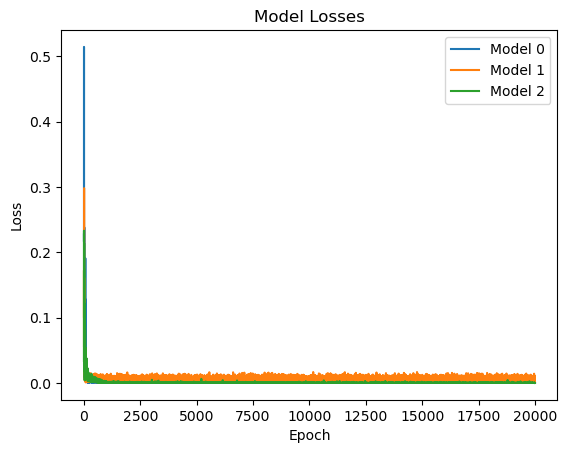

In [8]:
# prepare data
x_train = torch.linspace(-1, 1, 100).view(-1, 1)
y_train = sinc_function(x_train)  # y=x^2

train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)


model0 = Model0()
model1 = Model1()
model2 = Model2()

models = [model0, model1, model2]
losses = [[], [], []]  # Loss for each model

# Define loss and optimizer
criterion = nn.MSELoss()
optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]

# Train Models
num_epochs = 20000

for model_idx, model in tqdm(enumerate(models)):
    model.to(device) # GPU
    optimizer = optimizers[model_idx]
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs = inputs.to(device)# GPU
            targets = targets.to(device)# GPU
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # record loss
        losses[model_idx].append(loss.item())
        if epoch % 2000 == 0:  # Print the loss every 2000 epochs
            print(f'Model {model_idx}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# plt loss
for model_idx, model_losses in enumerate(losses):
    plt.plot(model_losses, label=f'Model {model_idx}')

plt.title('Model Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
device

device(type='cuda')

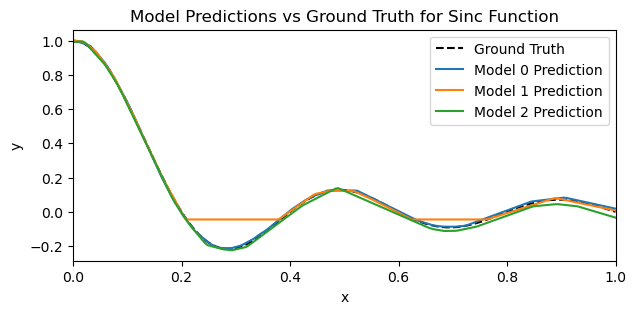

In [13]:
# Generate data

x_values = torch.linspace(-1, 1, 400).view(-1, 1)  
y_true = sinc_function(x_values)  


# Set the models to evaluation mode
model0.eval()
model1.eval()
model2.eval()

# Predictions
with torch.no_grad():  
    y_pred0 = model0(x_values.to(device))
    y_pred1 = model1(x_values.to(device))
    y_pred2 = model2(x_values.to(device))

# Visualize the results
plt.figure(figsize=(7, 3))

# True Value
plt.plot(x_values.numpy(), y_true.numpy(), label='Ground Truth', color='k', linestyle='--')

# Plot the model predictions
plt.plot(x_values.numpy(), y_pred0.cpu().numpy(), label='Model 0 Prediction')
plt.plot(x_values.numpy(), y_pred1.cpu().numpy(), label='Model 1 Prediction')
plt.plot(x_values.numpy(), y_pred2.cpu().numpy(), label='Model 2 Prediction')

plt.title('Model Predictions vs Ground Truth for Sinc Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xlim([0, max(x_values.numpy())])
plt.show()


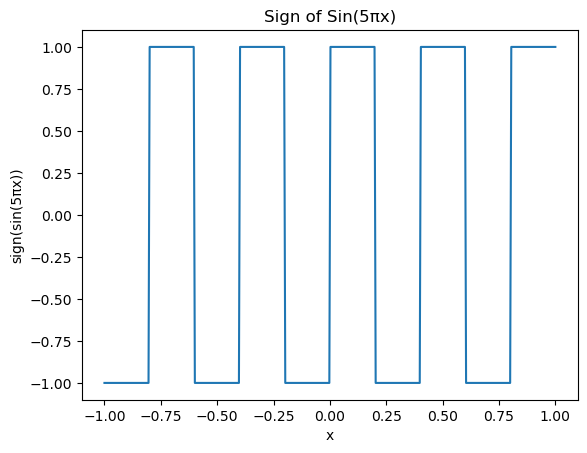

In [14]:
# Define the target function
def tensor_sign_sin(x):
    return torch.sign(torch.sin(5 * torch.pi * x))

# Generate data 
x_tensor = torch.linspace(-1, 1, 400)  

y_tensor = tensor_sign_sin(x_tensor)

# plt
plt.plot(x_tensor.numpy(), y_tensor.numpy())
plt.title('Sign of Sin(5πx)')
plt.xlabel('x')
plt.ylabel('sign(sin(5πx))')
# plt.xlim([0, max(x_values.numpy())])
plt.show()


Model 0, Epoch [2000/20000], Loss: 0.3407
Model 0, Epoch [4000/20000], Loss: 0.3141
Model 0, Epoch [6000/20000], Loss: 0.3029
Model 0, Epoch [8000/20000], Loss: 0.2963
Model 0, Epoch [10000/20000], Loss: 0.2955
Model 0, Epoch [12000/20000], Loss: 0.1531
Model 0, Epoch [14000/20000], Loss: 0.1109
Model 0, Epoch [16000/20000], Loss: 0.1023
Model 0, Epoch [18000/20000], Loss: 0.0991
Model 0, Epoch [20000/20000], Loss: 0.0995
Model 1, Epoch [2000/20000], Loss: 0.5192
Model 1, Epoch [4000/20000], Loss: 0.5094
Model 1, Epoch [6000/20000], Loss: 0.5021
Model 1, Epoch [8000/20000], Loss: 0.4964
Model 1, Epoch [10000/20000], Loss: 0.4927
Model 1, Epoch [12000/20000], Loss: 0.4915
Model 1, Epoch [14000/20000], Loss: 0.4891
Model 1, Epoch [16000/20000], Loss: 0.5003
Model 1, Epoch [18000/20000], Loss: 0.4878
Model 1, Epoch [20000/20000], Loss: 0.3707
Model 2, Epoch [2000/20000], Loss: 0.3123
Model 2, Epoch [4000/20000], Loss: 0.1939
Model 2, Epoch [6000/20000], Loss: 0.1609
Model 2, Epoch [8000/2

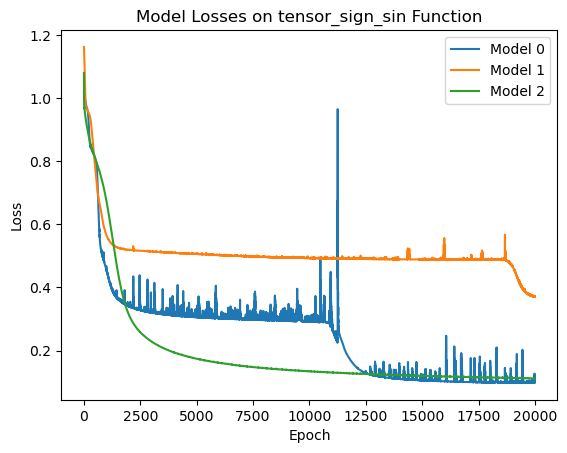

In [15]:
# Model Losses on tensor_sign_sin Function
x_train = torch.linspace(-1, 1, 1000).view(-1, 1)  
y_train = tensor_sign_sin(x_train)


model0 = Model0()
model1 = Model1()
model2 = Model2()

models = [model0, model1, model2]


criterion = nn.MSELoss()
optimizers = [optim.Adam(model.parameters(), lr=0.001) for model in models]


num_epochs = 20000  
losses = [[], [], []]  

for model_idx, model in enumerate(models):
    model.to(device)
    optimizer = optimizers[model_idx]
    for epoch in range(num_epochs):
        
        x_train = x_train.to(device)
        y_train = y_train.to(device)
        
        y_pred = model(x_train)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        
        losses[model_idx].append(loss.item())
        if (epoch+1) % 2000 == 0:  # 每2000个epoch打印一次损失值
            print(f'Model {model_idx}, Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

import matplotlib.pyplot as plt

for model_idx, model_losses in enumerate(losses):
    plt.plot(model_losses, label=f'Model {model_idx}')

plt.title('Model Losses on tensor_sign_sin Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
# device = 'cuda'

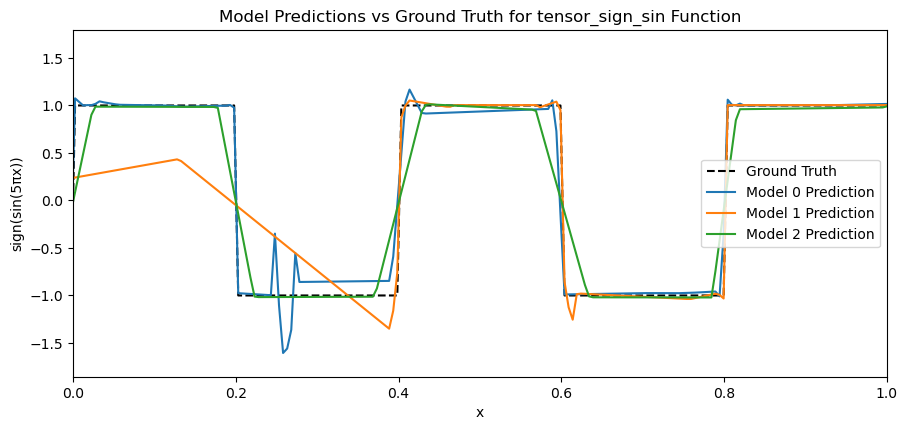

In [20]:
# Generate data for prediction
x_values = torch.linspace(-1, 1, 400).view(-1, 1)  
y_true = tensor_sign_sin(x_values)  


# Set the models to evaluation mode
model0.eval()
model1.eval()
model2.eval()

# Visualize the results
with torch.no_grad(): 
    y_pred0 = model0(x_values.to(device))
    y_pred1 = model1(x_values.to(device))
    y_pred2 = model2(x_values.to(device))

# plt
plt.figure(figsize=(14 * 0.75, 6 * 0.75))


# plt true values
plt.plot(x_values.numpy(), y_true.numpy(), label='Ground Truth', color='k', linestyle='--')

# Plot the model predictions
plt.plot(x_values.numpy(), y_pred0.cpu().numpy(), label='Model 0 Prediction')
plt.plot(x_values.numpy(), y_pred1.cpu().numpy(), label='Model 1 Prediction')
plt.plot(x_values.numpy(), y_pred2.cpu().numpy(), label='Model 2 Prediction')

plt.title('Model Predictions vs Ground Truth for tensor_sign_sin Function')
plt.xlabel('x')
plt.ylabel('sign(sin(5πx))')
plt.legend()
plt.xlim([0, max(x_values.numpy())])
plt.show()


## Train on Actual Tasks: MNIST

Training Model 1...
Epoch 1, Loss: 0.2174, Accuracy: 93.59%
Epoch 2, Loss: 0.0635, Accuracy: 98.02%
Epoch 3, Loss: 0.0451, Accuracy: 98.61%
Epoch 4, Loss: 0.0365, Accuracy: 98.87%
Epoch 5, Loss: 0.0294, Accuracy: 99.09%
Epoch 6, Loss: 0.0268, Accuracy: 99.13%
Epoch 7, Loss: 0.0223, Accuracy: 99.30%
Epoch 8, Loss: 0.0194, Accuracy: 99.39%
Epoch 9, Loss: 0.0184, Accuracy: 99.41%
Epoch 10, Loss: 0.0147, Accuracy: 99.53%
Epoch 11, Loss: 0.0137, Accuracy: 99.56%
Epoch 12, Loss: 0.0117, Accuracy: 99.61%
Epoch 13, Loss: 0.0114, Accuracy: 99.63%
Epoch 14, Loss: 0.0100, Accuracy: 99.67%
Epoch 15, Loss: 0.0089, Accuracy: 99.73%
Epoch 16, Loss: 0.0097, Accuracy: 99.67%
Epoch 17, Loss: 0.0080, Accuracy: 99.75%
Epoch 18, Loss: 0.0080, Accuracy: 99.74%
Epoch 19, Loss: 0.0069, Accuracy: 99.77%
Epoch 20, Loss: 0.0066, Accuracy: 99.77%
Epoch 21, Loss: 0.0076, Accuracy: 99.74%
Epoch 22, Loss: 0.0055, Accuracy: 99.82%
Epoch 23, Loss: 0.0061, Accuracy: 99.78%
Epoch 24, Loss: 0.0052, Accuracy: 99.83%
Epoch

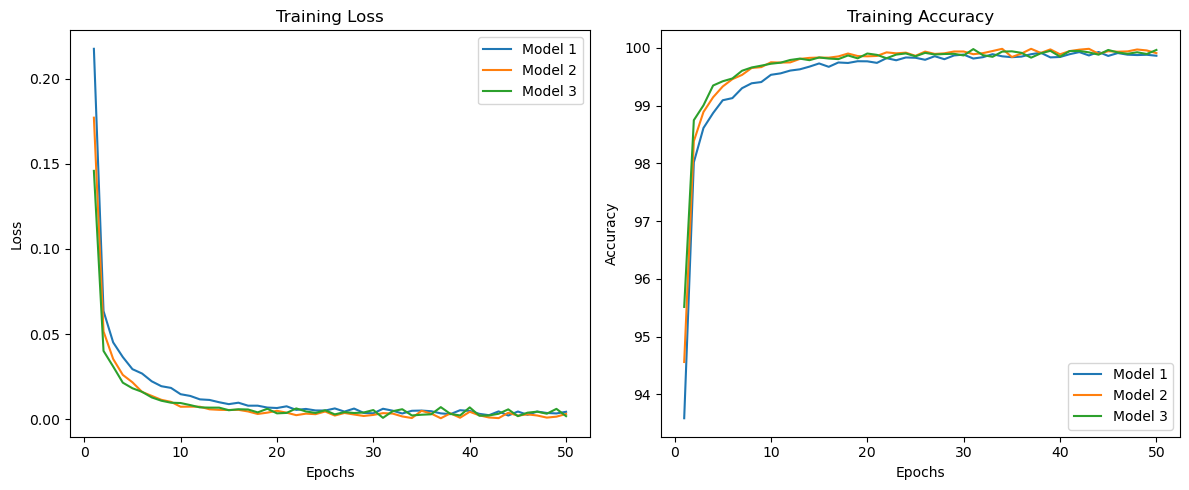

In [22]:

# Step 1: Define CNN models
# Define the first CNN model
class CNNModel1(nn.Module):
    def __init__(self):
        super(CNNModel1, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)  # Input channels, output channels, kernel size
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)  # Fully connected layers
        self.fc2 = nn.Linear(50, 10)   # Output layer for 10 classes

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # Apply ReLU and max pooling
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)  # Apply log softmax to the output

# Define the second CNN model
class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)  # Using padding
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(7*7*32, 128)  # Adjusting size for the flattened tensor
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 7*7*32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Define the third CNN model
class CNNModel3(nn.Module):
    def __init__(self):
        super(CNNModel3, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Adding a third convolutional layer
        self.fc1 = nn.Linear(3*3*128, 256)  # Adjusting size for the added layer
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 3*3*128)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Step 2: Load MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

# Step 3: Training Loop with Metrics Tracking
def train_and_evaluate(model, device, train_loader, epochs=50):
    model.to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.CrossEntropyLoss()

    # Lists for saving epoch-wise loss and accuracy
    epoch_losses = []
    epoch_accuracies = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = data.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100. * correct / total

        epoch_losses.append(epoch_loss)
        epoch_accuracies.append(epoch_accuracy)

        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    return epoch_losses, epoch_accuracies

# Step 4: Initialize models, device, and train
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

models = [CNNModel1(), CNNModel2(), CNNModel3()]
model_names = ['Model 1', 'Model 2', 'Model 3']
metrics = {}

for i, model in enumerate(models):
    print(f'Training {model_names[i]}...')
    losses, accuracies = train_and_evaluate(model, device, train_loader)
    metrics[model_names[i]] = {'loss': losses, 'accuracy': accuracies}

# Step 5: Visualize Training Metrics
def plot_metrics(metrics):
    plt.figure(figsize=(12, 5))
    
    for label, metric in metrics.items():
        epochs = range(1, len(metric['loss']) + 1)
        
        plt.subplot(1, 2, 1)
        plt.plot(epochs, metric['loss'], label=label)
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(epochs, metric['accuracy'], label=label)
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)
